DATA PROCESSING :
I WILL BE PROCESSING THE DATA TO PERFORM CLUSTERING OPERATIONS 

In [43]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

LOAD THE DATA

In [44]:
# Load dataset saved from data evaluation
df = pd.read_csv("feature_engineered_data.csv")

print(f"✅ Loaded dataset with shape: {df.shape}")
df.head()


✅ Loaded dataset with shape: (2212, 30)


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Costumer_for,age,total_spend,living_with,Children,Family_Size,is_parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,68,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,71,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,60,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,41,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,44,422,Partner,1,3,1


<a id="4"></a>
# <p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DATA PREPROCESSING</p>

In this section, I will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [45]:
#lis the categoreis varablies which are in strings

s = (df.dtypes == "object")
objects_col = list(s[s].index)
print(objects_col)

['Education', 'living_with']


In [46]:
#transform the strings to number 
LE = LabelEncoder()
for i in objects_col:
 df[i] = df[[i]].apply(LE.fit_transform)
 
 print('All features are now numeric')
 


All features are now numeric
All features are now numeric


feature scaling 
since clustering is distance base , features with lager numberical data can dominate the result. to aviod  this bias all features are scaled 

In [47]:

ds = df.copy()
#create  a subset of dataframe by dropping features on deals accepted and promotions
cols_del = ["AcceptedCmp3", "AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2",'Complain','Response']
ds = ds.drop(cols_del,axis=1)
ds.head()

#scaling   data into standard normal dstribution(mean = 0 standardScaler = 1)
scaler =StandardScaler()
scaler.fit(ds)
scaler_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)
print("All features are now scaled")

All features are now scaled


In [48]:
print("dataframe will used for further modelling")
scaler_ds.head()

dataframe will used for further modelling


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Costumer_for,age,total_spend,living_with,Children,Family_Size,is_parent
0,-0.507308,0.287105,-0.822754,-0.929699,0.310353,0.977660,1.552041,1.690293,2.453472,1.483713,...,2.503607,-0.555814,0.692181,1.527721,1.018352,1.676245,-1.349603,-1.264598,-1.758359,-1.581139
1,-0.507308,-0.260882,1.040021,0.908097,-0.380813,-0.872618,-0.637461,-0.718230,-0.651004,-0.634019,...,-0.571340,-1.171160,-0.132545,-1.189011,1.274785,-0.963297,-1.349603,1.404572,0.449070,0.632456
2,-0.507308,0.913196,-0.822754,-0.929699,-0.795514,0.357935,0.570540,-0.178542,1.339513,-0.147184,...,-0.229679,1.290224,-0.544908,-0.206048,0.334530,0.280110,0.740959,-1.264598,-0.654644,-1.581139
3,-0.507308,-1.176114,1.040021,-0.929699,-0.795514,-0.872618,-0.561961,-0.655787,-0.504911,-0.585335,...,-0.913000,-0.555814,0.279818,-1.060584,-1.289547,-0.920135,0.740959,0.069987,0.449070,0.632456
4,0.979003,0.294307,1.040021,-0.929699,1.554453,-0.392257,0.419540,-0.218684,0.152508,-0.001133,...,0.111982,0.059532,-0.132545,-0.951915,-1.033114,-0.307562,0.740959,0.069987,0.449070,0.632456


<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">DIMENSIONALITY REDUCTION</p>

a set of relavant features where selected for clustering reducing noise and computational complexity

Why dimensional reduction in costumer segementation
some datsets has to many features which are
1) highly correlated
2) nosicy and reductant(not useful for clustering)
3) hard to visualize

(PCA)principle components analyisis is a techque that project data into  fewer dimention while retaining most of the information 

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe


In [49]:
#reducing the data into 3 dimensions

pca = PCA(n_components=3)#creating a pca object
pca.fit(scaler_ds)#this tells pca to study the data
pca.transform(scaler_ds)#after studying the data , pca transform it those dimensions

#put the transform data into a table 
pca_ds = pd.DataFrame(pca.transform(scaler_ds),columns=(['col1','col2','col3']))
#view the statistics of the PCA transformed data
pca_ds.describe().T #t flip the tables so that rows and columns are in the right format

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,5.139550e-17,2.878157,-5.983627,-2.536209,-0.779118,2.380741,7.450997
col2,2212.0,3.212219e-17,1.708115,-4.258546,-1.312345,-0.171454,1.237682,6.224678
col3,2212.0,7.629019e-18,1.234753,-3.622004,-0.810377,-0.039393,0.847553,6.669034


You compressed your customers into 3 new features.

Each new feature has values centered around 0, with different spreads.

col1 captures the most customer variation, then col2, then col3.

This will help when you cluster customers (like with K-means), because instead of clustering on many noisy features, you cluster on the 3 strongest signals.

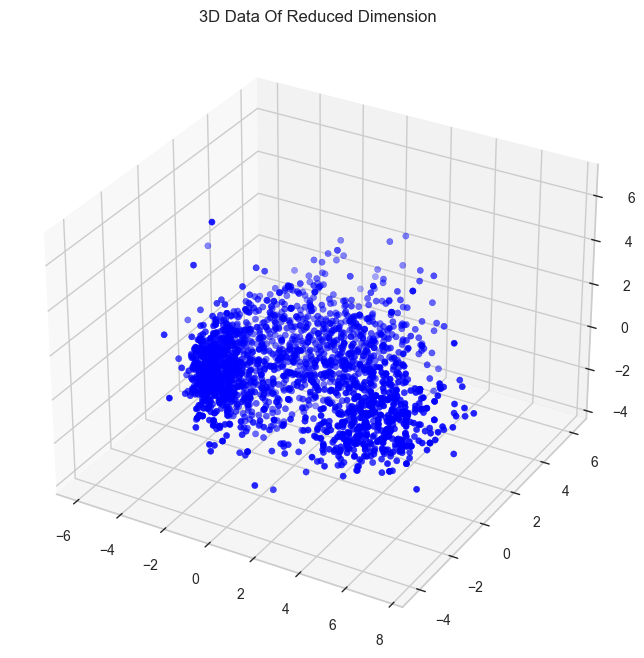

In [50]:
# lets select the three new features
x = pca_ds['col1']
y= pca_ds['col2']
z = pca_ds['col3']

#lets plot 
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z, c='blue',marker='o')
ax.set_title("3D Data Of Reduced Dimension")
plt.show()


In [51]:
# Export PCA reduced dataset to a CSV file
pca_ds.to_csv("clustering_data.csv", index=False)

print("PCA reduced dataset exported successfully for clustering!")


PCA reduced dataset exported successfully for clustering!
